In [80]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as ss
import pylab as pl

In [362]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.cluster import KMeans,AffinityPropagation,MeanShift,SpectralClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import StratifiedShuffleSplit,GridSearchCV, cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTETomek
from scipy.stats import chi,mode
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import svm 
from sklearn.svm import LinearSVC,LinearSVR,SVC
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import(LogisticRegressionCV,RidgeCV,LassoCV,LarsCV,LassoLarsIC,BayesianRidge,ElasticNetCV,OrthogonalMatchingPursuit,HuberRegressor,ARDRegression,PassiveAggressiveClassifier)
from sklearn.feature_selection import RFE,SelectKBest,f_classif,SelectFdr
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import accuracy_score


In [4]:
# 1.Preprocessing data (Descriptive data analysis and data cleaning)
##1.1 Load data and data summury
rawdata=pd.read_csv("C:/ckme136/default of credit card clients.csv",skiprows=1)
rawdata.columns.tolist()
rawdata.columns=['ID','LMT_B','SEX','EDU','MARRG','AGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','B_AMT1','B_AMT2','B_AMT3','B_AMT4','B_AMT5','B_AMT6',\
                  'P_AMT1','P_AMT2','P_AMT3','P_AMT4','P_AMT5','P_AMT6','DEFAULT']

catcol=['SEX','EDU','MARRG','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','DEFAULT']
numcol=['LMT_B','AGE','B_AMT1','B_AMT2','B_AMT3','B_AMT4','B_AMT5','B_AMT6','P_AMT1','P_AMT2','P_AMT3','P_AMT4','P_AMT5','P_AMT6']
rawdata=rawdata.drop("ID",1)

In [5]:
###1.1.1 summaries of data
pd.set_option('display.max_columns', 600)
rawdata.info()
rawdata.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LMT_B      30000 non-null int64
SEX        30000 non-null int64
EDU        30000 non-null int64
MARRG      30000 non-null int64
AGE        30000 non-null int64
PAY_0      30000 non-null int64
PAY_2      30000 non-null int64
PAY_3      30000 non-null int64
PAY_4      30000 non-null int64
PAY_5      30000 non-null int64
PAY_6      30000 non-null int64
B_AMT1     30000 non-null int64
B_AMT2     30000 non-null int64
B_AMT3     30000 non-null int64
B_AMT4     30000 non-null int64
B_AMT5     30000 non-null int64
B_AMT6     30000 non-null int64
P_AMT1     30000 non-null int64
P_AMT2     30000 non-null int64
P_AMT3     30000 non-null int64
P_AMT4     30000 non-null int64
P_AMT5     30000 non-null int64
P_AMT6     30000 non-null int64
DEFAULT    30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


,LMT_B,SEX,EDU,MARRG,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,B_AMT1,B_AMT2,B_AMT3,B_AMT4,B_AMT5,B_AMT6,P_AMT1,P_AMT2,P_AMT3,P_AMT4,P_AMT5,P_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [6]:
###1.1.2 check missing values 
check_null=pd.isnull(rawdata)
check_null.sum(axis = 0, skipna = False)

LMT_B      0
SEX        0
EDU        0
MARRG      0
AGE        0
PAY_0      0
PAY_2      0
PAY_3      0
PAY_4      0
PAY_5      0
PAY_6      0
B_AMT1     0
B_AMT2     0
B_AMT3     0
B_AMT4     0
B_AMT5     0
B_AMT6     0
P_AMT1     0
P_AMT2     0
P_AMT3     0
P_AMT4     0
P_AMT5     0
P_AMT6     0
DEFAULT    0
dtype: int64

In [7]:
##1.2 dealing with the categorical attributes
###1.2.1 check the categorical attributes' values
for x in catcol:
    y=pd.DataFrame(rawdata[x].value_counts().sort_index())
    print(y)
##EDUCATION and MARRAGE have some unknown data,need imputation

     SEX
1  11888
2  18112
     EDU
0     14
1  10585
2  14030
3   4917
4    123
5    280
6     51
   MARRG
0     54
1  13659
2  15964
3    323
    PAY_0
-2   2759
-1   5686
 0  14737
 1   3688
 2   2667
 3    322
 4     76
 5     26
 6     11
 7      9
 8     19
    PAY_2
-2   3782
-1   6050
 0  15730
 1     28
 2   3927
 3    326
 4     99
 5     25
 6     12
 7     20
 8      1
    PAY_3
-2   4085
-1   5938
 0  15764
 1      4
 2   3819
 3    240
 4     76
 5     21
 6     23
 7     27
 8      3
    PAY_4
-2   4348
-1   5687
 0  16455
 1      2
 2   3159
 3    180
 4     69
 5     35
 6      5
 7     58
 8      2
    PAY_5
-2   4546
-1   5539
 0  16947
 2   2626
 3    178
 4     84
 5     17
 6      4
 7     58
 8      1
    PAY_6
-2   4895
-1   5740
 0  16286
 2   2766
 3    184
 4     49
 5     13
 6     19
 7     46
 8      2
   DEFAULT
0    23364
1     6636


In [8]:
###1.2.2 categorical attributes imputation (cleaning data)
data_cln1=rawdata

##For Education: replace values =0,5,6 to 4
for x in [0,5,6]:
    data_cln1.loc[data_cln1['EDU']==x, 'EDU'] = 4

##For Marriage: replace value = 0 to 3
data_cln1.loc[data_cln1['MARRG']==0, 'MARRG'] = 3
   
for x in ["EDU","MARRG"]:
    y=pd.DataFrame(data_cln1[x].value_counts().sort_index())
    print(y)


     EDU
1  10585
2  14030
3   4917
4    468
   MARRG
1  13659
2  15964
3    377


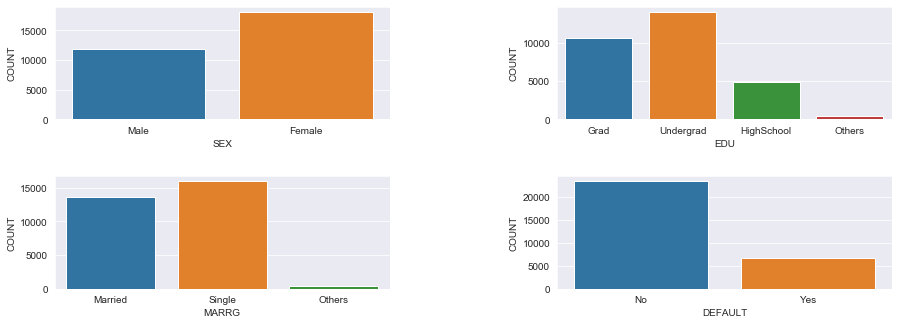

In [9]:
###1.2.3 data distrubution of the categorical attributes
#Draw countplot  
sns.set_style("darkgrid")
fig1, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(15,4))
df1=data_cln1.loc[:,['SEX','EDU','MARRG','DEFAULT']]
axes_1=[ax1, ax2, ax3,ax4]
SEX_label=['Male','Female']
EDU_label=['Grad','Undergrad','HighSchool','Others']
MARRG_label=['Married','Single','Others']
DEFAULT_label=['No','Yes']
xtick_labels_1=[SEX_label,EDU_label,MARRG_label,DEFAULT_label]
for i in range(0,4):
    sns.countplot(x=df1.columns[i],data=df1,ax=axes_1[i])
    xlbl=axes_1[i].get_xlabel()
    axes_1[i].set_xlabel(xlbl,fontsize=10)
    axes_1[i].set_ylabel('COUNT',fontsize=10)
    axes_1[i].set_xticklabels(xtick_labels_1[i])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
plt.show()


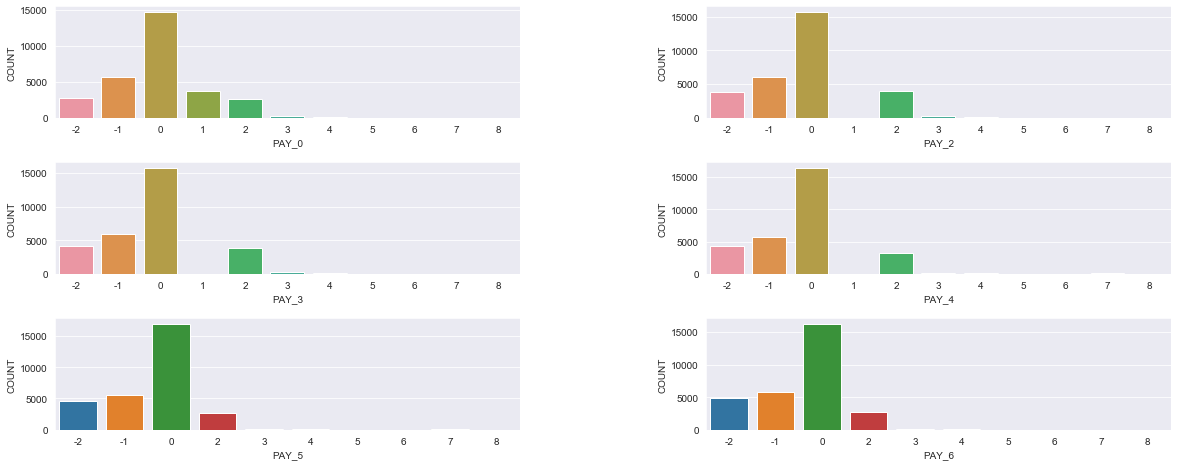

In [10]:
fig2, ((ax4, ax5),(ax6,ax7),(ax8,ax9)) = plt.subplots(nrows=3, ncols=2,figsize=(20,6))
df2=data_cln1[catcol].drop(['SEX','EDU','MARRG','DEFAULT'],1)
axes_2=[ax4,ax5,ax6,ax7,ax8,ax9]
for i in range(0,6):
    sns.countplot(x=df2.columns[i],data=df2,ax=axes_2[i])
    xlbl=axes_2[i].get_xlabel()
    axes_2[i].set_xlabel(xlbl,fontsize=10)
    axes_2[i].set_ylabel('COUNT',fontsize=10)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.4)
plt.show()

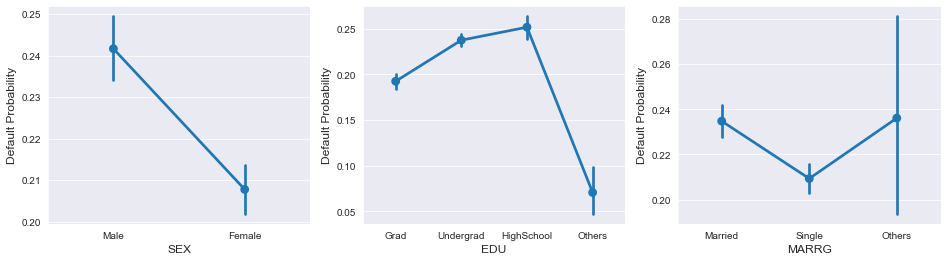

In [11]:
###1.2.4 relationship between class attribute and categorical attributes
####(1) one categorical attribute vs class attribute
fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(16,4))
df1=data_cln1.loc[:,['SEX','EDU','MARRG','DEFAULT']]
axes1=[ax1,ax2,ax3]
xtick_labels1=[SEX_label,EDU_label,MARRG_label]
for i in range(0,3):
    b=sns.catplot(x=df1.columns[i],y='DEFAULT',data=df1, kind="point",
                    ax=axes1[i])
    axes1[i].set_ylabel('Default Probability',fontsize=12)
    xlbl=axes1[i].get_xlabel()
    axes1[i].set_xlabel(xlbl,fontsize=12)
    axes1[i].set_xticklabels(xtick_labels1[i])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.4)
for i in range(0,3):
    plt.close(i+2)
plt.show()

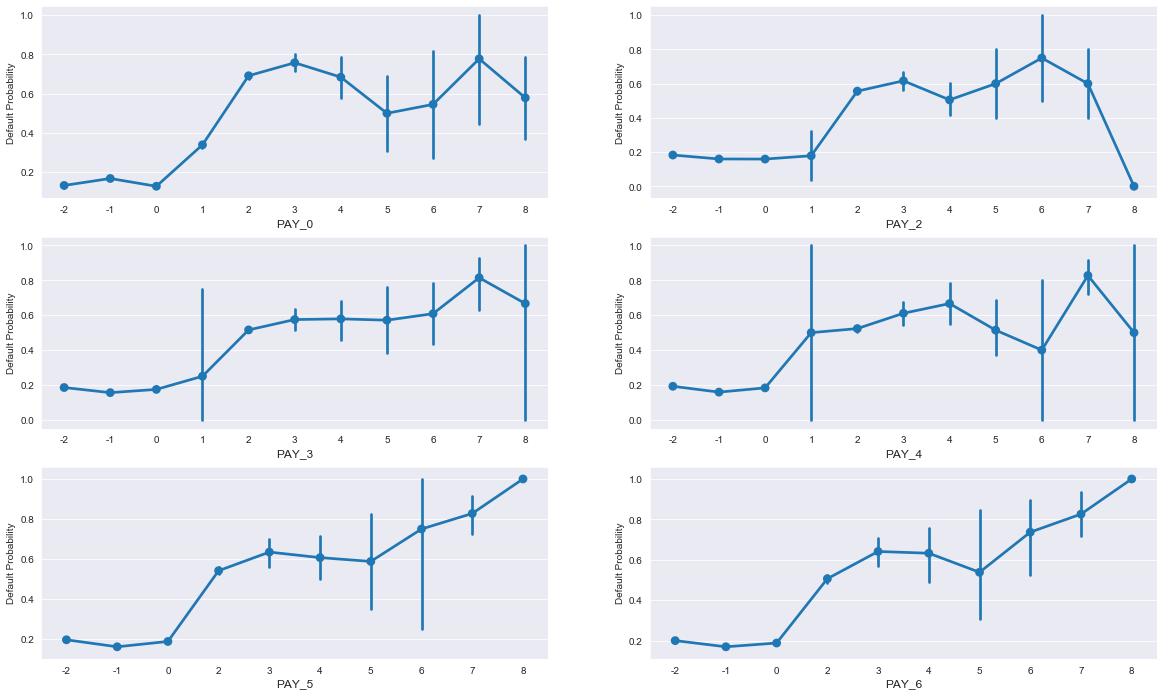

In [12]:

fig2, ((ax4, ax5),(ax6,ax7),(ax8,ax9)) = plt.subplots(nrows=3, ncols=2,figsize=(20,12))
df2=data_cln1[catcol].drop(['SEX','EDU','MARRG'],1)
axes2=[ax4,ax5,ax6,ax7,ax8,ax9]
for i in range(0,6):
    sns.catplot(x=df2.columns[i],y='DEFAULT',data=df2, kind="point",
                    ax=axes2[i])
    axes2[i].set(ylabel='Default Probability')
    xlbl=axes2[i].get_xlabel()
    axes2[i].set_xlabel(xlbl,fontsize=12)
for i in range(0,6):
    plt.close(i+2)
plt.show()

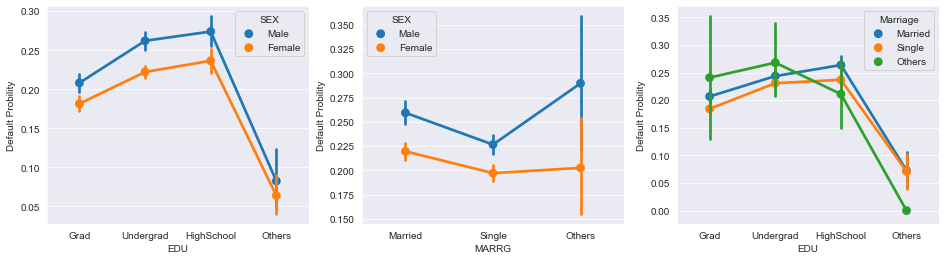

In [13]:
#####(2)two categorical attribute vs class attribute
###SEX,EDU vs Default
fig1,((ax1,ax2,ax3))=plt.subplots(nrows=1,ncols=3,figsize=(16,4))

Sex_Edu=sns.catplot(x='EDU',y='DEFAULT',hue='SEX',data=data_cln1, kind="point",ax=ax1)
ax1.set(ylabel='Default Probility')
ax1.set_xticklabels(EDU_label)
current_handles, current_labels=ax1.get_legend_handles_labels()
ax1.legend(current_handles,SEX_label,title="SEX")

Sex_Marrg=sns.catplot(x='MARRG',y='DEFAULT',hue='SEX',data=data_cln1, kind="point",ax=ax2)
ax2.set(ylabel='Default Probility')
ax2.set_xticklabels(MARRG_label)
current_handles, current_labels=ax2.get_legend_handles_labels()
ax2.legend(current_handles,SEX_label,title="SEX")

Marrg_Edu=sns.catplot(x='EDU',y='DEFAULT',hue='MARRG',data=data_cln1, kind="point",ax=ax3)
ax3.set(ylabel='Default Probility')
ax3.set_xticklabels(EDU_label)
current_handles, current_labels=ax3.get_legend_handles_labels()
ax3.legend(current_handles,MARRG_label,title="Marriage")

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.4)

for i in range(0,3):
    plt.close(i+2)
plt.show()

C:\Users\sunsu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


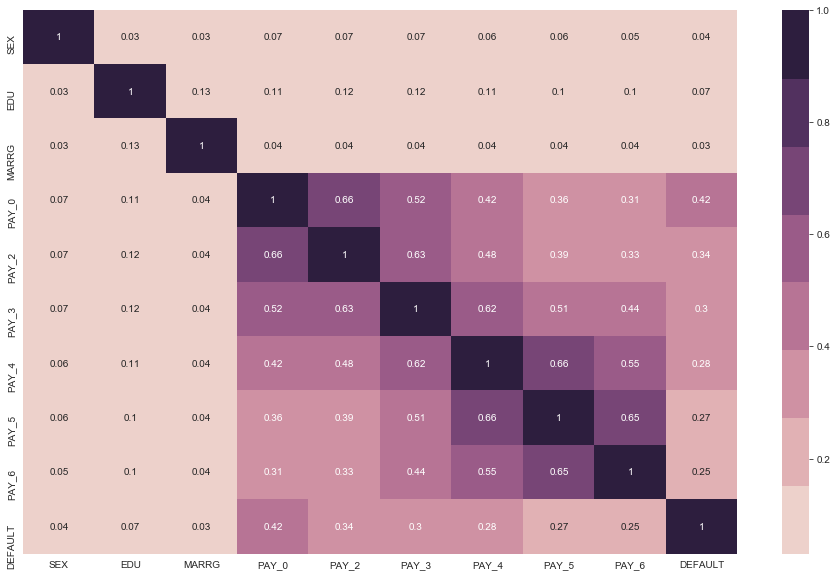

In [14]:
####(3)categorical attributes correlations
cat_df=data_cln1[catcol]
for col in catcol:
    cat_df[col]=cat_df[col].astype('category')
cat_df   
def cramers_v(x,y):
    confusion_matrix = pd.crosstab(x,y).values
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

corr_df = pd.DataFrame(index=catcol, columns=catcol)
corr_df= corr_df.fillna(0)
for col in cat_df.columns:
    for indx in cat_df.columns:
        corr_df.loc[indx,col]=cramers_v(cat_df[indx],cat_df[col]).round(2)
plt.figure(figsize=(16,10))
ax=sns.heatmap(corr_df,annot=True,cmap=sns.cubehelix_palette(8))
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

plt.show()

In [15]:
## 1.3 dealing with the numeric attributes
###1.3.1 check numeric attributes's values
data_cln1[numcol].describe()

,LMT_B,AGE,B_AMT1,B_AMT2,B_AMT3,B_AMT4,B_AMT5,B_AMT6,P_AMT1,P_AMT2,P_AMT3,P_AMT4,P_AMT5,P_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


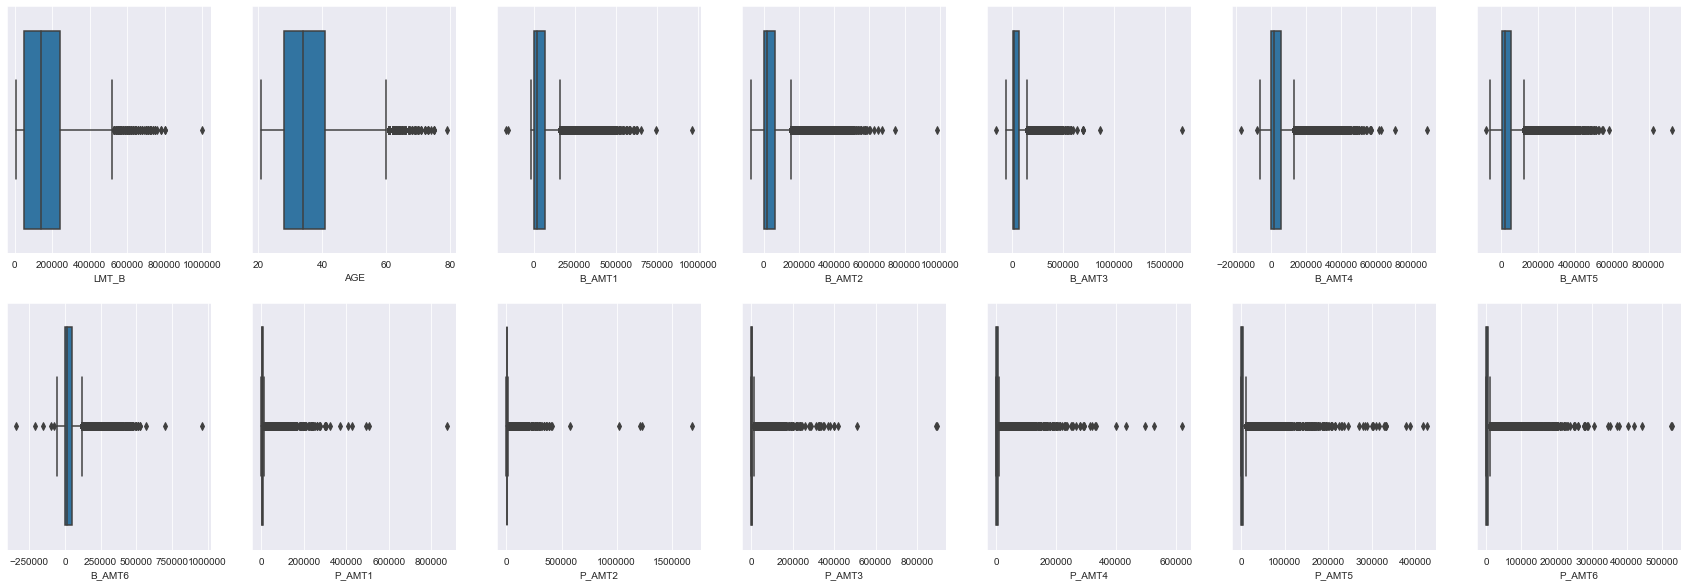

In [16]:
###1.3.2 boxplot of numeric attributes
fig, ((ax1, ax2,ax3,ax4,ax5,ax6,ax7),(ax8,ax9,ax10,ax11,ax12,ax13,ax14)) = plt.subplots(nrows=2, ncols=7,figsize=(30,10))
ax=[ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14]
for i in range(0,14):
    sns.boxplot(x=data_cln1[data_cln1[numcol].columns[i]],ax=ax[i])
plt.show()

In [354]:
###1.3.3 outliers detection (replace outliers values with median values).
def find_outliers(x):
    Q1=np.percentile(x,25)
    Q3=np.percentile(x,75)
    IQR=Q3-Q1
    L_OUT=Q1-1.5*IQR
    H_OUT=Q3+1.5*IQR
    indices=list(x.index[(x<L_OUT)|(x>H_OUT)])
    values=list(x[indices])
    return indices, values


for col in numcol:
        pos,outliers=find_outliers(data_cln1[col])
        num=len(outliers)
        print(col,num,end='\n\r') 
       

LMT_B 167
AGE 272
B_AMT1 2400
B_AMT2 2395
B_AMT3 2469
B_AMT4 2622
B_AMT5 2725
B_AMT6 2693
P_AMT1 2745
P_AMT2 2714
P_AMT3 2598
P_AMT4 2994
P_AMT5 2945
P_AMT6 2958


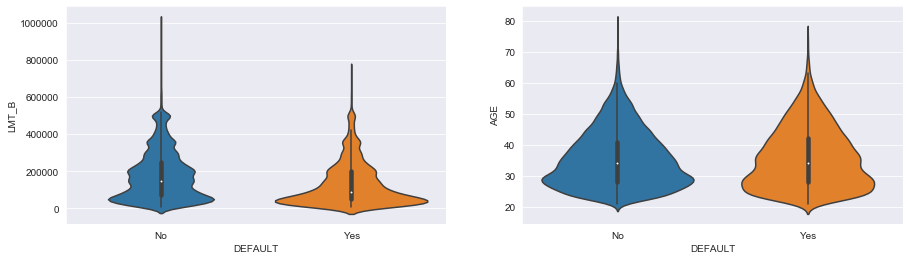

In [18]:
###1.3.4 relations between numeric attributes and class attribute
####(1) single numeric attribute vs class attribute
combo_attr=numcol[:]
combo_attr.append("DEFAULT")
combo_df=data_cln1[combo_attr]
df1=combo_df.loc[:,['LMT_B',"AGE","DEFAULT"]]

fig1,((ax1,ax2)) =plt.subplots(nrows=1, ncols=2,figsize=(15,4))
axes1=[ax1,ax2]
for i in range(0,2):
    p1=sns.violinplot(x='DEFAULT',y=df1.columns[i],data=df1,ax=axes1[i])   
    axes1[i].set_xticklabels(DEFAULT_label)



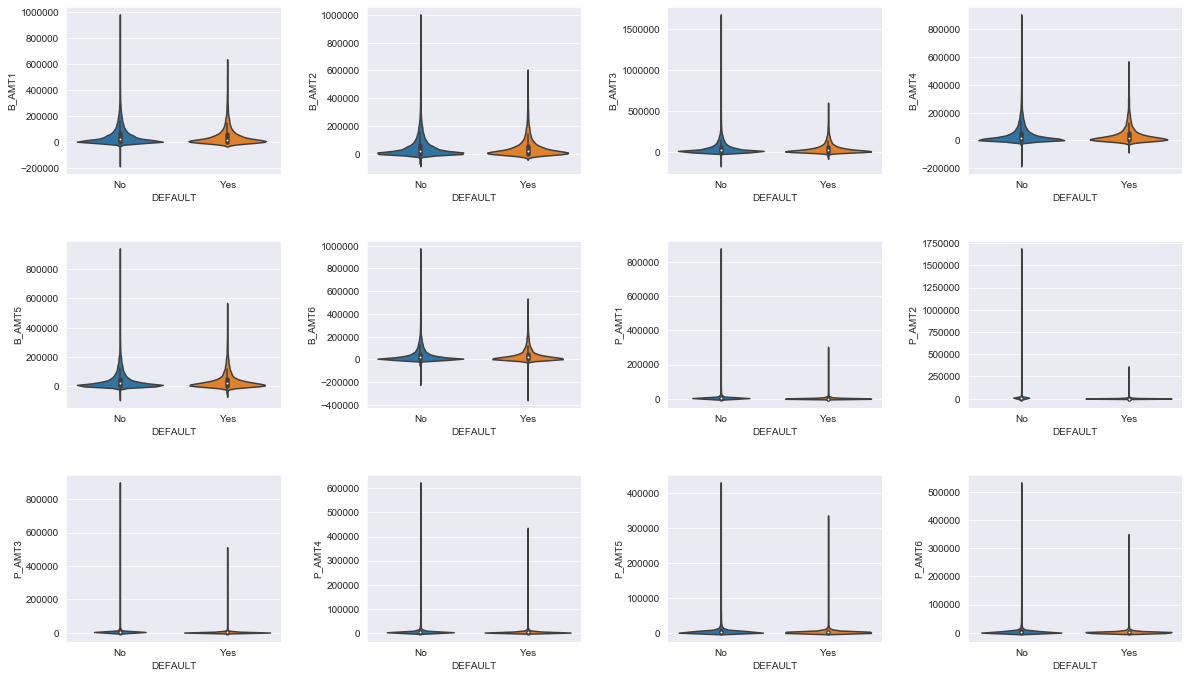

In [19]:
df2=combo_df.drop(['LMT_B',"AGE"],1)
fig2, ((ax3,ax4,ax5,ax6),(ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14)) = plt.subplots(nrows=3, ncols=4,figsize=(20,9))
axes2=[ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14]
for i in range(0,12):
    p2=sns.violinplot(x='DEFAULT',y=df2.columns[i],data=df2,ax=axes2[i])
    axes2[i].set_xticklabels(DEFAULT_label)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.4)   
plt.show()

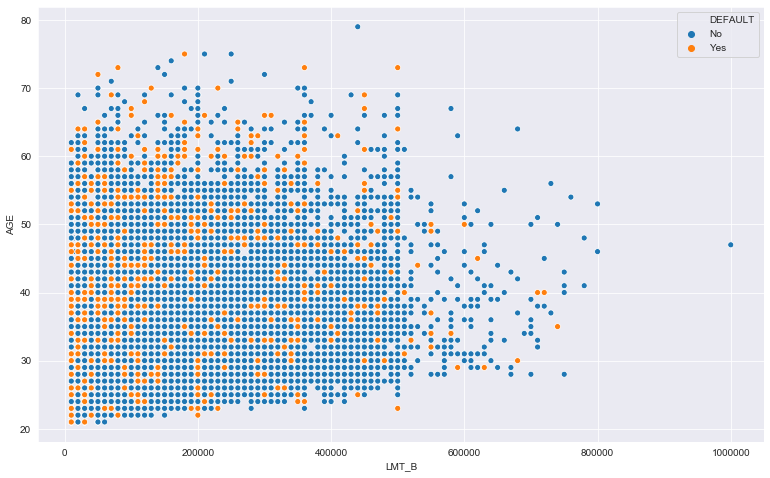

In [20]:
####(2) two numeric attributes vs class attribute
plt.figure(figsize=(13,8))
p=sns.scatterplot(x=df1['LMT_B'], y=df1['AGE'],hue=df1['DEFAULT'])
current_handles, current_labels=p.get_legend_handles_labels()
p.legend(current_handles,['DEFAULT', 'No', 'Yes'],loc='upper right',prop={'size': 10})
plt.show()

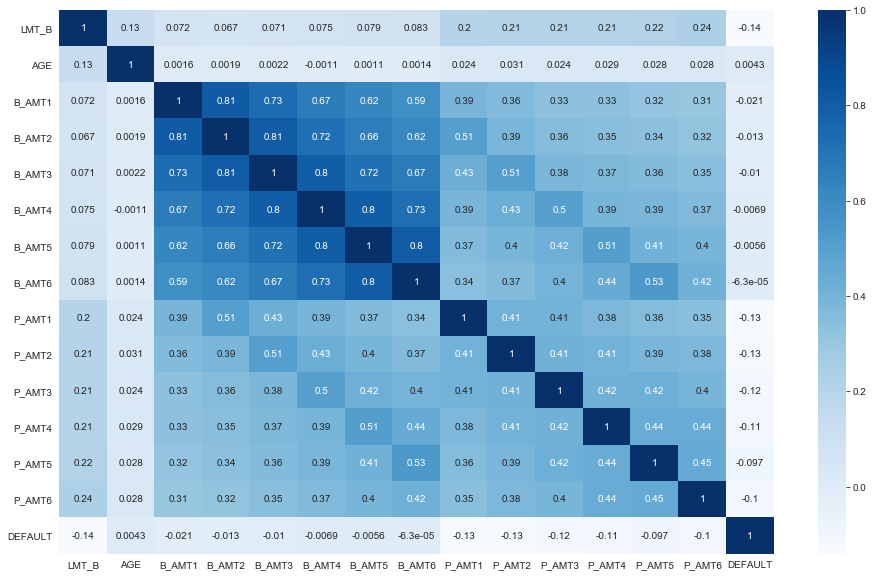

In [21]:
####(3) correlation between numeric attribues
corr_num=combo_df.corr(method ='kendall')
plt.figure(figsize=(16,10))
ax=sns.heatmap(corr_num,annot=True,cmap="Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

plt.show()

In [22]:
#2 Feature Selections
##2.1 Data transformation
###2.1.1 get dummies 
DummyList=catcol[0:9]

df_dummy=data_cln1[:]

for x in DummyList:
    df_dummy[x]=df_dummy[x].astype("category")
    
df_dummy=pd.get_dummies(df_dummy)
df_dummy

,LMT_B,AGE,B_AMT1,B_AMT2,B_AMT3,B_AMT4,B_AMT5,B_AMT6,P_AMT1,P_AMT2,P_AMT3,P_AMT4,P_AMT5,P_AMT6,DEFAULT,SEX_1,SEX_2,EDU_1,EDU_2,EDU_3,EDU_4,MARRG_1,MARRG_2,MARRG_3,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [264]:
###2.1.2 Data MinMax scaling
scaler=RobustScaler()
df_scale=df_dummy.copy(deep=True)
scale=pd.DataFrame(scaler.fit_transform(df_scale[numcol]),columns=df_scale[numcol].columns)
for x in numcol:
    df_scale[x]=scale[x]
df_scale

,LMT_B,AGE,B_AMT1,B_AMT2,B_AMT3,B_AMT4,B_AMT5,B_AMT6,P_AMT1,P_AMT2,P_AMT3,P_AMT4,P_AMT5,P_AMT6,DEFAULT,SEX_1,SEX_2,EDU_1,EDU_2,EDU_3,EDU_4,MARRG_1,MARRG_2,MARRG_3,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,-0.631579,-0.769231,-0.290695,-0.296584,-0.337391,-0.365126,-0.373848,-0.356074,-0.524214,-0.316775,-0.437424,-0.403524,-0.396930,-0.386374,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,-0.105263,-0.615385,-0.310071,-0.319150,-0.302730,-0.302419,-0.302504,-0.288055,-0.524214,-0.242141,-0.194411,-0.134508,-0.396930,0.128791,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,-0.263158,0.000000,0.107937,-0.117549,-0.113559,-0.090477,-0.065180,-0.031747,-0.145282,-0.122150,-0.194411,-0.134508,-0.132310,0.901539,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,-0.473684,0.230769,0.387339,0.443008,0.507883,0.177504,0.224139,0.260230,-0.024963,0.002400,-0.145808,-0.107606,-0.114051,-0.128791,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,-0.473684,1.769231,-0.216654,-0.254500,0.273859,0.036183,0.021506,0.042968,-0.024963,8.320614,1.992710,2.017621,-0.214607,-0.211475,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.421053,0.384615,2.621763,2.812369,3.274459,1.321445,0.271179,-0.022757,1.597604,4.317495,0.778372,0.416168,0.926171,-0.128791,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
29996,0.052632,0.692308,-0.325795,-0.317462,-0.288468,-0.193046,-0.266677,-0.356074,-0.065652,0.364051,1.749210,-0.368821,-0.396930,-0.386374,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
29997,-0.578947,0.230769,-0.296172,-0.292422,-0.301408,0.034995,0.051159,0.047682,-0.524214,-0.482121,4.908870,0.726343,0.132310,0.412132,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
29998,-0.315789,0.538462,-0.378178,0.937030,0.977686,0.646272,-0.129049,0.664821,20.918622,0.335973,-0.151154,0.114601,13.618418,0.078305,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [24]:
##2.2 Feature-Selection models

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.4, random_state=0)
X_df=df_scale.drop("DEFAULT",1)
X=X_df.values
y_df=df_scale["DEFAULT"]
y=y_df.values

col_names=X_df.columns

def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks))





In [25]:
####2.2.1 Models choosen
ridgeCV=RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])

lassoCV=LassoCV(cv=5,random_state=0)

larsCV=LarsCV(cv=5)

lalaIC=LassoLarsIC(criterion='bic')

bayeRdg=BayesianRidge()

rfe = RFE(LogisticRegression(),n_features_to_select=5)

adboost = AdaBoostRegressor(random_state=0)

et = ExtraTreesRegressor(random_state=0)

rf = RandomForestRegressor(random_state=0)

gb=GradientBoostingRegressor(random_state=0)

models=[ridgeCV,lassoCV,larsCV,lalaIC,bayeRdg,rfe,adboost,et,rf,gb]
models_names=['ridgeCV','lassoCV','larsCV','lalaIC','bayeRdg','rfe','adboost','et','rf','gb']



In [328]:
####2.2.2 Feature Selection Model building
avg_scores = []
ranks = {}

for i in range(10): 
    scores=[]
    coefs=[]
    for train_index,test_index in sss.split(X,y):
        x_train = X_df.iloc[train_index]
        x_test = X_df.iloc[test_index]
        y_train = y_df.iloc[train_index]
        y_test = y_df.iloc[test_index] 
        Model=models[i].fit(x_train,y_train)
        scores.append(Model.score(x_test,y_test))
        if i<5:
            coefs.append(np.abs(Model.coef_))
        elif i==5:
            coefs.append(np.abs(Model.ranking_))
        elif i>5:
            coefs.append(np.abs(Model.feature_importances_))
    avg_score=np.mean(scores)
    if i == 5:
        ranks[models_names[i]] = rank_to_dict(pd.DataFrame(coefs).mean().values,col_names,order=-1)
    else:
        ranks[models_names[i]] = rank_to_dict(pd.DataFrame(coefs).mean().values,col_names,order=1)
    avg_scores.append(avg_score)

In [27]:
###2.2.4 Feature selection results
pd.set_option('display.max.rows', 600)

results=pd.DataFrame.from_dict(ranks)
avg_scores

[0.20698530829236478,
 0.20785382091374144,
 0.2062764712527767,
 0.2029606098422044,
 0.20799734493214528,
 0.8200416666666666,
 0.16917976310095195,
 0.05260044326751519,
 0.11080269665100115,
 0.21998140567008234]

In [355]:
adj_r=results.copy(deep=True)
for i in range(10):
    adj_r.iloc[:,i]=(adj_r.iloc[:,i]*avg_scores[i])/np.sum(avg_scores)*10


In [55]:
#Feature Ranks
MeanScore =pd.DataFrame(adj_r.mean(axis=1),columns=['MeanScore'])
Feature_Ranks=MeanScore.sort_values('MeanScore',ascending= False)
Feature_Ranks

,MeanScore
PAY_0_2,0.979371
PAY_0_3,0.744894
PAY_0_0,0.575057
PAY_0_4,0.541931
PAY_0_-2,0.526187
PAY_6_8,0.448921
PAY_5_7,0.443924
EDU_4,0.436731
PAY_0_-1,0.414623
PAY_6_3,0.407611


In [ ]:
###2.2.5 Feature selected data 
####(1)selection threshold is MeanScore>0.1
Fs_df1=df_scale.loc[:,Feature_Ranks.loc[Feature_Ranks['MeanScore']>=0.1,:].index]
Fs_df1["DEFAULT"]=df_scale["DEFAULT"]
####(2)selection thresold is MeanScore>0.2
Fs_df2=df_scale.loc[:,Feature_Ranks.loc[Feature_Ranks['MeanScore']>=0.2,:].index]
Fs_df2["DEFAULT"]=df_scale["DEFAULT"]
####(3)Dataset without Feature selection
NoFs_df=df_scale

####export dataframes
NoFs_df.to_csv('C:\ckme136\df.csv')
Fs_df1.to_csv('C:\ckme136\df1.csv')
Fs_df2.to_csv('C:\ckme136\df2.csv')


In [ ]:
#4. Unsupervised learning (clustering)
##4.1 PCA plot
df_2D=df_scale.copy(deep=True)
pca_2D=df_2D.drop("DEFAULT",1).values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_2D)

In [298]:
df_2D['pca-one'] = pca_result[:,0]
df_2D['pca-two'] = pca_result[:,1] 

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.3163916  0.15328045]


In [289]:
np.random.seed(42)
rndperm = np.random.permutation(df_2D.shape[0])

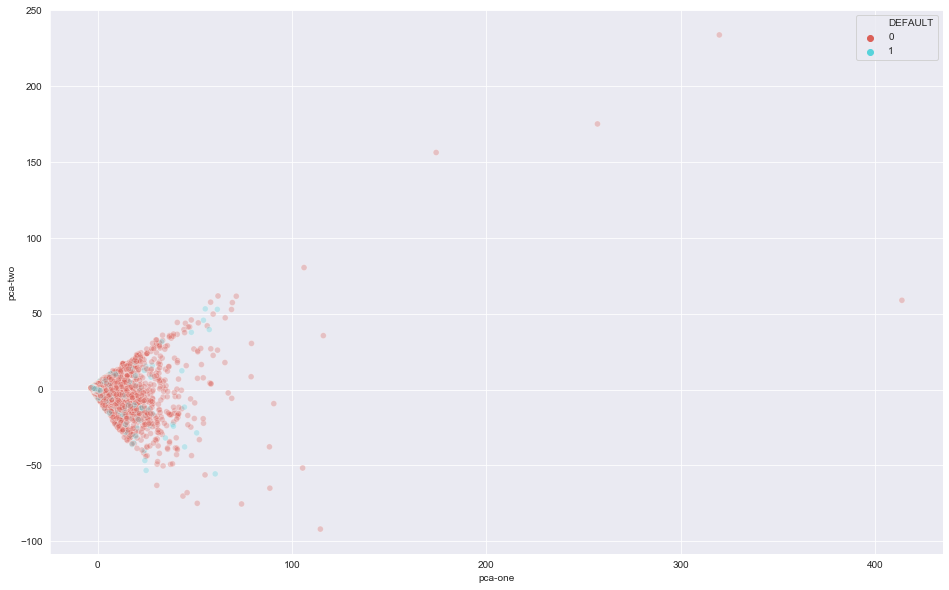

In [290]:
####4.1.1 True DEFAULT data on PCA 2-dimensional plot 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="DEFAULT",
    palette=sns.color_palette("hls", 2),
    data=df_2D.loc[rndperm,:],
    legend="full",
    alpha=0.3
)
plt.show()

In [342]:
## 4.1.2 K-Means clustering results (K=2) on PCA 2-dimensional plot
df_2D=df_scale.copy(deep=True)
km_X=df_2D.drop("DEFAULT",1).values
km = KMeans(n_clusters=2, random_state=0)
km.fit(km_X)
est_y = km.predict(km_X)

In [345]:
df_2D['pca-one'] = pca_result[:,0]
df_2D['pca-two'] = pca_result[:,1] 

In [346]:
est_y[np.where(est_y==1)]=2
est_y[np.where(est_y==0)]=1
est_y[np.where(est_y==2)]=0

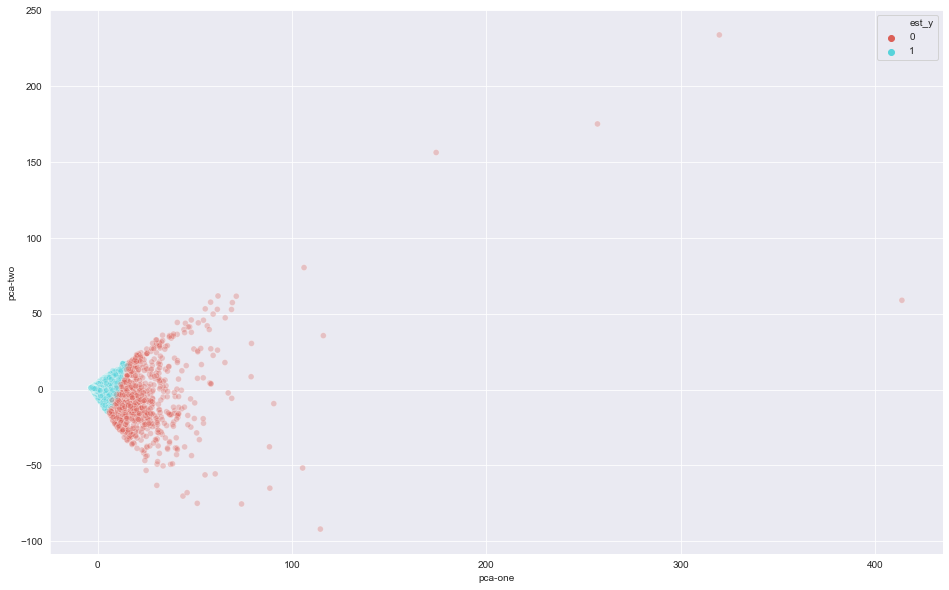

In [349]:
#### plotting results

df_2D["est_y"]=est_y
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="est_y",
    palette=sns.color_palette("hls", 2),
    data=df_2D.loc[rndperm,:],
    legend="full",
    alpha=0.3
)
plt.show()

In [308]:
##4.2 T-Distributed Stochastic Neighbouring Entities (t-SNE)plot
df_2D=df_scale.copy(deep=True)
tsne_2D=df_2D.drop("DEFAULT",1).values
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
tsne_results = tsne.fit_transform(tsne_2D)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.456s...
[t-SNE] Computed neighbors for 30000 samples in 246.145s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for 

In [319]:
df_2D['tsne-2d-one'] = tsne_results[:,0]
df_2D['tsne-2d-two'] = tsne_results[:,1]

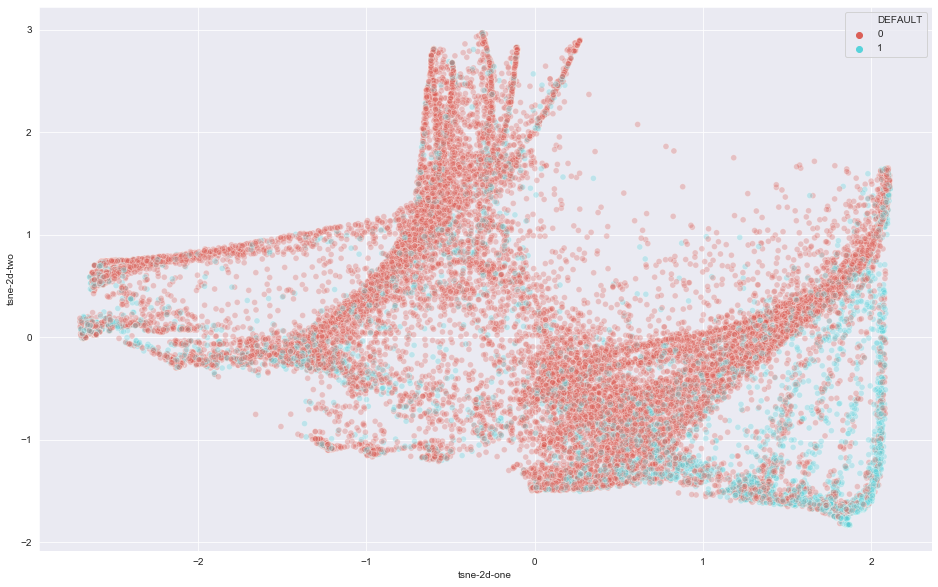

In [309]:
###4.2.1 True DEFAULT data on PCA 2-dimensional plot 
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="DEFAULT",
    palette=sns.color_palette("hls", 2),
    data=df_2D,
    legend="full",
    alpha=0.3
)
plt.show()

In [330]:
df_2D["est_y"]=est_y


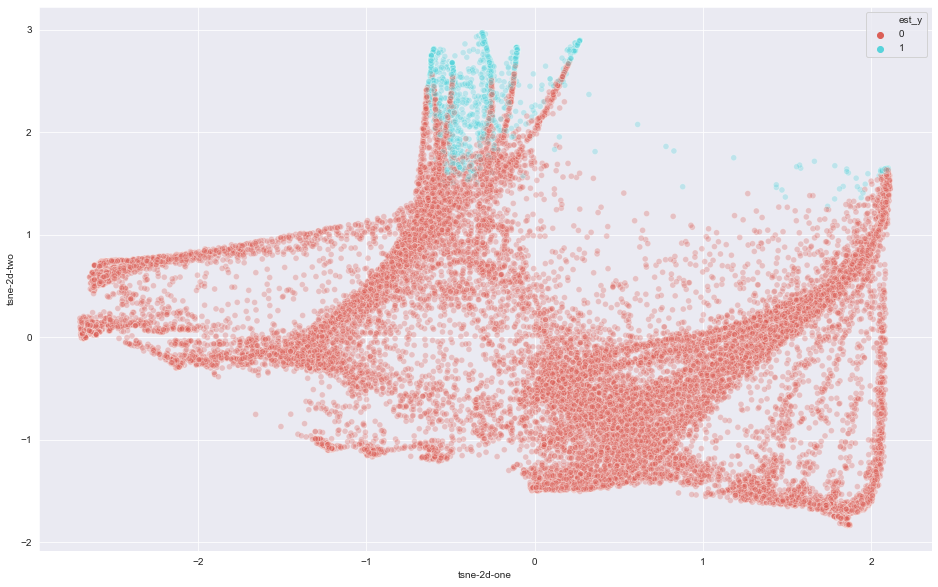

In [322]:
###4.2.2 K-Means (K=2) clustering results on PCA 2-dimensional plot 
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="est_y",
    palette=sns.color_palette("hls", 2),
    data=df_2D,
    legend="full",
    alpha=0.3
)
plt.show()


In [353]:
#4.2.3 Accuracy score of K=2 Kmeans clustering
accuracy_score(df_2D.DEFAULT, est_y)


0.2564666666666667

In [337]:
#### K-Means (K=10) clustering results 
df_2D=df_scale.copy(deep=True)
km_X=df_2D.drop("DEFAULT",1).values
km = KMeans(n_clusters=10, random_state=0)
kmfit=km.fit(km_X)
est_y = km.predict(km_X)


In [335]:
df_2D['tsne-2d-one'] = tsne_results[:,0]
df_2D['tsne-2d-two'] = tsne_results[:,1]
df_2D["est_y"]=est_y

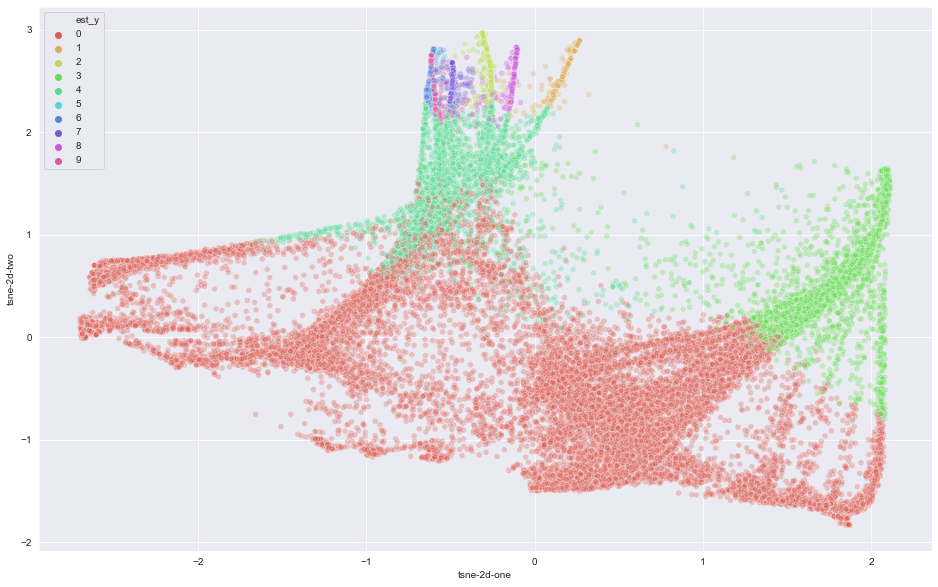

In [336]:
####plot 10 clusters on tsne_2-dimension plot
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="est_y",
    palette=sns.color_palette("hls", 10),
    data=df_2D,
    legend="full",
    alpha=0.3
)
plt.show()
